# Introduction to Jupyter Notebooks, [NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) and [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html)

These will be our two most standard imports, which by convention are imported into the namespace as `plt` and `np`.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Import and visualize standard benchmark image data sets

## Examine and draw data from [MNIST](https://yann.lecun.com/exdb/mnist/)





In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

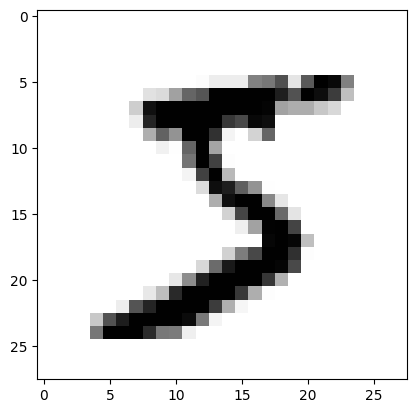

In [ ]:
## Basic matplotlib command to plot a single digit
plt.imshow(train_X[0], cmap=plt.cm.binary)
plt.show()

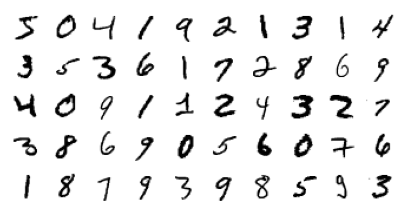

In [ ]:
## Creating a grid to plot the first 50 digits on
h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
for i in range(h):
    for j in range(w):
        axes[i][j].imshow(train_X[w * i + j], cmap=plt.cm.binary)
        axes[i][j].axis('off')

### Task 1
Now can you make a plot where each column contains the first 5 instances of that digit from the dataset?

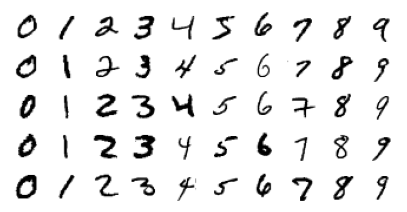

In [ ]:

lst = [0]*10
h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
count = 0
ind = 0
while count < 50:
  if lst[train_y[ind]] < 5:
    axes[lst[train_y[ind]]][train_y[ind]].imshow(train_X[ind], cmap=plt.cm.binary)
    axes[lst[train_y[ind]]][train_y[ind]].axis('off')
    count += 1
    lst[train_y[ind]] += 1
  ind += 1


## Examine and draw data from [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
from keras.datasets import cifar10
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


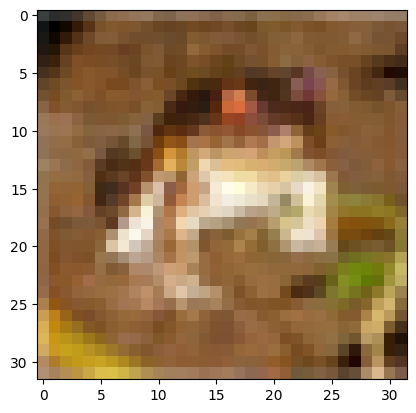

In [ ]:
## Basic matplotlib command to plot a image
plt.imshow(train_X[0])
plt.show()

### Task 2
Make a similar grid for CIFAR-10, where either each row or each column all has images from the same class, and add a label for that class

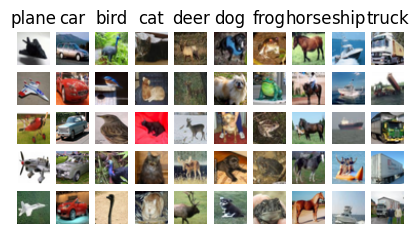

In [ ]:
## Creating a grid to plot the first 50 digits on
lst = [0]*10
h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
count = 0
ind = 0
while count < 50:
  if lst[train_y[ind][0]] < 5:
    axes[lst[train_y[ind][0]]][train_y[ind][0]].imshow(train_X[ind], cmap=plt.cm.binary)
    axes[lst[train_y[ind][0]]][train_y[ind][0]].axis('off')
    count += 1
    lst[train_y[ind][0]] += 1
  ind += 1

labellist = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for x in range(10):
  axes[0, x].set_title(labellist[x])

### Bonus Tasks
Can you create any other visualizations of our datasets? Are there any other classification datasets you can find to visualize?

# Generate Toy 2D Data Sets

Our standard image data sets will be very high dimensional, so it will be useful to also have some 2D example data sets that let us visualize how our various models work.

`X` will be a numpy array of datapoints and `y` will be a numpy array of class labels, which for our purposes will simply be integers starting at `0`.

In [ ]:
#### Example data points to show
X = np.array([[ 1.09552218, -0.09272374],
       [ 0.73918262,  0.17328342],
       [ 0.49026465,  0.49654933],
       [ 0.22117347,  0.74908991],
       [-0.00771262,  0.9228498 ],
       [ 0.04485428, -0.07363758],
       [-0.18909266,  0.24609735],
       [-0.50931804,  0.40888908],
       [-0.77501111,  0.76200558],
       [-0.92010407,  1.0518896 ]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Given these data types, here's a simple function that produces a scatter plot, colored by classification label

In [ ]:
def plot_2d_data(X, y):
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, sizes=len(X)*[0.01])

In [ ]:
plot_2d_data(X,y)

NameError: name 'X' is not defined

## Points on a line with noise

### Task 3
We are going to make some toy 2D data sets to later visualize how various models work. Here's one concrete function to write:

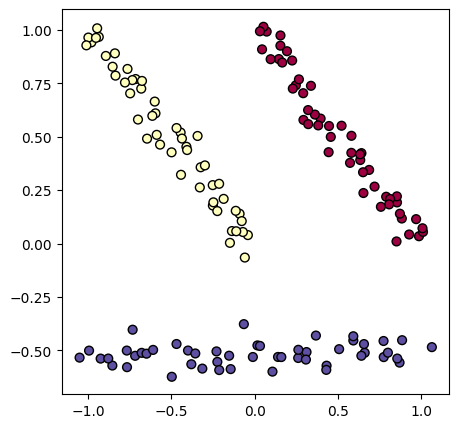

In [ ]:
def make_cluster_data(num_points = 50, noise = 0.05,
                      line_points = [((1,0), (0,1)),
                                     ((0, 0), (-1, 1)),
                                     ((-1,-0.5), (1,-0.5))]):
    """Create num_points points linearly spaced between each pair of points in line_points,
    with a gaussian noise term added, where noise is the standard deviation."""
    n = num_points * len(line_points)
    points = np.zeros((n, 2))
    labels = np.zeros(n, dtype=int)
    for y in range(len(line_points)):
      for x in range(0, num_points):
        points[y*num_points+x,0]=(line_points[y][1][0]-line_points[y][0][0])*(x/(num_points-1.0))+line_points[y][0][0]+np.random.normal(0,noise)
        points[y*num_points+x,1]=(line_points[y][1][1]-line_points[y][0][1])*(x/(num_points-1.0))+line_points[y][0][1]+np.random.normal(0,noise)
        labels[y*num_points+x]=y

    ### Fill in the function
    return points, labels

plot_2d_data(*make_cluster_data())

As an example, if we call
`plot_2d_data(*make_cluster_data())`
with these default settings, we should see an image like
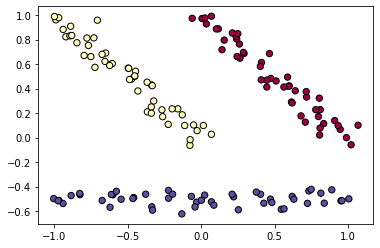

## Bonus Task

Can you make any other interesting looking data sets in a 2d plane? One pretty choice is for data that is in a spiral shape
`plot_2d_data(*make_spiral_data(100, 3))`
makes the following

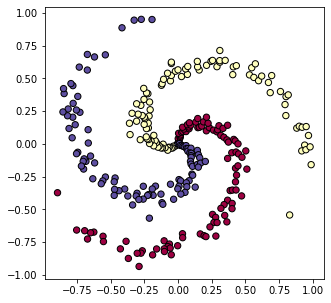

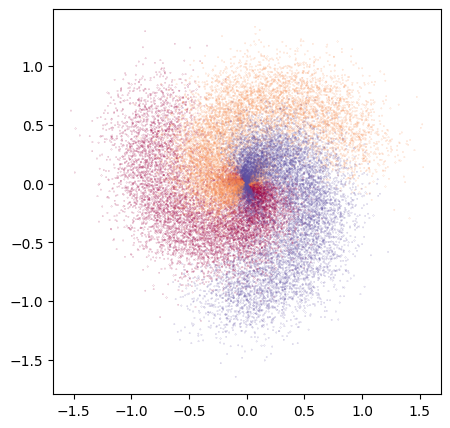

In [ ]:
def make_spiral_data(num_points, num_classes):
    """Generate spiral data."""
    line_points = []
    for x in range(num_classes):
      line_points.append([(x*2*np.pi/num_classes,0),(x*2*np.pi/num_classes+np.pi*1.25,1)])
    store = make_cluster_data(num_points, 0.2, line_points)
    lines = store[0]
    for x in range(num_points*len(line_points)):
      currx = lines[x,0]
      curry = lines[x,1]
      lines[x,0]=np.cos(-currx)*curry
      lines[x,1]=np.sin(-currx)*curry
    store[1][store[1] >= 2] += store[1][store[1] >= 2]
    return lines,store[1]


plot_2d_data(*make_spiral_data(10000, 3))
# X, y = make_spiral_data(1000, 3)
# plot_2d_data(X, np.array([0, 1, 3], dtype=np.int32)[y])

# Test 2D Data Sets
Here's a function we will use more in future assignments to visualize the classification boundaries our model is creating

In [ ]:
def plot_2d_classifier(X, y, classifier):
    """Makes a scatter plot of the data points and a background of what the classifier does.
    X is a (n,2) array of data points.
        y is an (n,) array of labels.
        classifier is a function that takes a 2d points
         and gives a label."""
    border = 0.2
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    num_points = 100
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                        np.linspace(y_min, y_max, num_points))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    classes = np.array([classifier(p) for p in grid_points])
    classes = classes.reshape(xx.shape)
    fig = plt.figure(figsize = (6,6))
    plt.contourf(xx, yy, classes, 3, cmap=plt.cm.Spectral, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

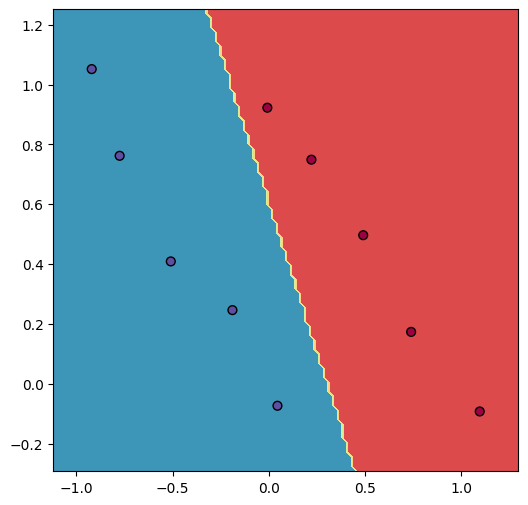

In [ ]:
#### Example data points to show
X = np.array([[ 1.09552218, -0.09272374],
       [ 0.73918262,  0.17328342],
       [ 0.49026465,  0.49654933],
       [ 0.22117347,  0.74908991],
       [-0.00771262,  0.9228498 ],
       [ 0.04485428, -0.07363758],
       [-0.18909266,  0.24609735],
       [-0.50931804,  0.40888908],
       [-0.77501111,  0.76200558],
       [-0.92010407,  1.0518896 ]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

def predict(x):
    if x[0] + 0.5 * x[1] > 0.3:
        return 0
    else:
        return 1

plot_2d_classifier(X, y, predict)

### Bonus Task
Can you make a handwritten function for any of your toy data sets that does a good job of classifying all the points?

# References

## Resources Used

Mention any resources used while working on this assignments (include links, mention people, put in LLM queries)

Stackoverflow, Numpy Manual

## Reflection

How long did you spend working on this assignment?

Any issues / feedback?